We use the Iris dataset, which is a 3-class dataset in which 1 class is linearly separable from the others but the other are not linearly separable from each other. The classes correpond to different types of Iris plants while the 4 features represent the dimensions of the leaves. It is a typical test case for many statistical classification techniques in machine learning. Ref:- https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

We can load the dataset with:

In [5]:
from sklearn.datasets import load_iris

(X, y) = load_iris(return_X_y=True)

X and y are the features and the label, respectively. We can look at the format of the data:

In [6]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)
float64
int64


As you can see, X and y are numpy arrays. There are a total of 150 samples in the dataset. X has 4 features per sample, and y are the corresponding classes.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

We can plot some features against each other to see how the features relate to each other:

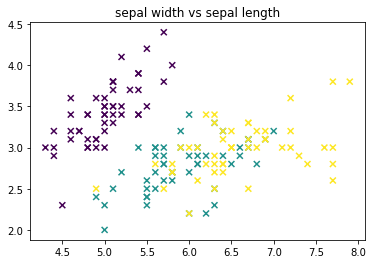

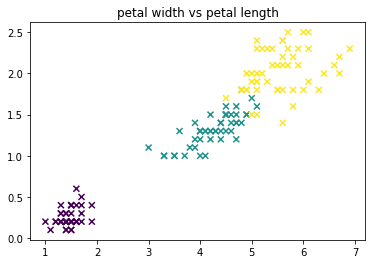

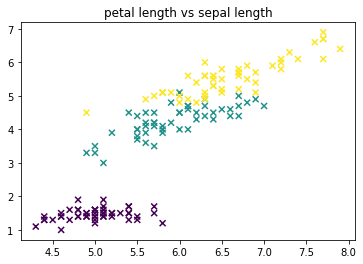

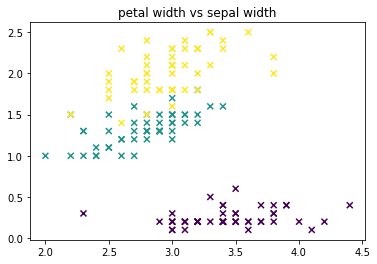

In [8]:
features = ["sepal length", "sepal width", "petal length", "petal width"]

permutations = [(0, 1), (2, 3), (0, 2), (1, 3)]

for i, j in permutations:
    plt.figure()
    plt.title(f"{features[j]} vs {features[i]}")
    plt.scatter(X[:, i], X[:, j], marker="x", c=y)
    plt.show()

We can see that one class is separable from the others, while perfectly separating the other two classes linearly is not possible. Here are the tasks we perform in this notebook:

- Add and adapt classification code from the binary classification, so that is can predict the class label for each sample.
- Use the sklearn method [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to obtain an evaluation of the classification performance. The result should be:

<pre>
             precision    recall  f1-score   support

          0     1.0000    1.0000    1.0000        50
          1     0.9600    0.9600    0.9600        50
          2     0.9600    0.9600    0.9600        50

avg / total     0.9733    0.9733    0.9733       150
</pre>

## Solution

In [1]:
from sklearn.datasets import load_iris

(X, y) = load_iris(return_X_y=True)

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)
float64
int64


Calculating weights

In [3]:
import numpy as np

ones = np.ones(X.shape[0])
X_ = np.c_[X, ones]

In [4]:
X_mat = np.matrix(X_)
y_mat = np.matrix(y).reshape(-1, 1)

print(X_mat.shape)
print(y_mat.shape)

weights = ((X_mat.T @ X_mat).I @ X_mat.T) @ y_mat
print(weights.shape)

(150, 5)
(150, 1)
(5, 1)


[-0.10127251  0.00075935 -0.08986307 -0.10250365 -0.22665221 -0.0410495
 -0.033167   -0.02162416 -0.03219801 -0.0107835 ]
[0 0 0 0 0 0 0 0 0 0]


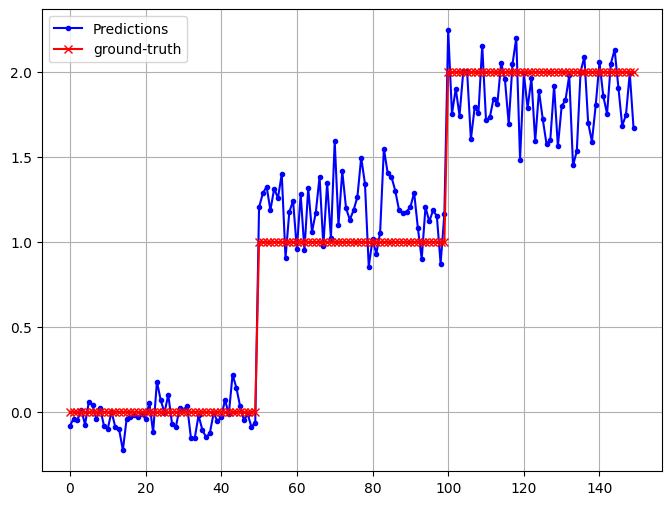

In [5]:
predictions = X_mat @ weights
residuals = y - predictions
predictions = np.asarray(predictions).reshape(-1)
print(predictions[10:20])
print(y[10:20])

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(predictions, marker='.', color='b', label='Predictions')
plt.plot(y, marker='x', color='red', label='ground-truth')

plt.legend()
plt.grid(True)
plt.show()

Classification

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        50
           1    0.96000   0.96000   0.96000        50
           2    0.96000   0.96000   0.96000        50

    accuracy                        0.97333       150
   macro avg    0.97333   0.97333   0.97333       150
weighted avg    0.97333   0.97333   0.97333       150



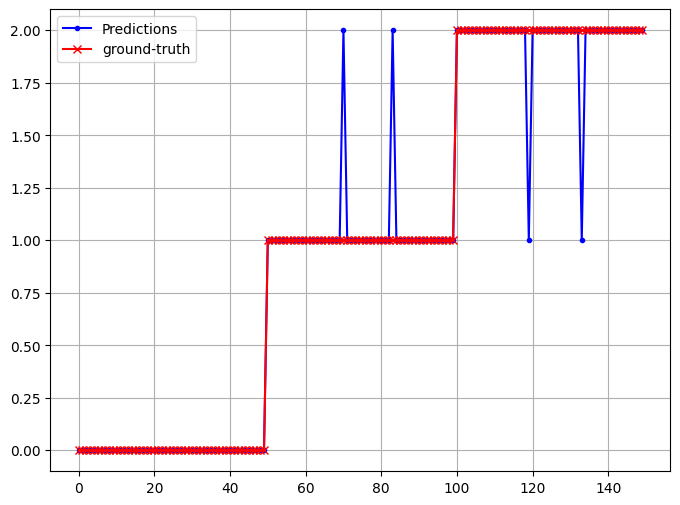

In [6]:
predictions = X_mat @ weights
residuals = y - predictions
#012
threshold1 = 0.5
threshold2 = 1.5


classification = predictions.copy()

classification[predictions <=threshold1] = 0
classification[(predictions > threshold1) & (predictions <= threshold2)] = 1
classification[predictions > threshold2] = 2

classification = np.asarray(classification).reshape(-1)
import sklearn.metrics
print(sklearn.metrics.classification_report(y, classification, digits=5))
plt.figure(figsize=(8, 6))
plt.plot(classification, marker='.', color='b', label='Predictions')
plt.plot(y, marker='x', color='red', label='ground-truth')

plt.legend()
plt.grid(True)
plt.show()

Accuracy

In [7]:
classification = np.asarray(classification).reshape(-1)
accuracy = np.mean(classification == y)
print("Accuracy:", accuracy)

Accuracy: 0.9733333333333334
